In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/data.csv')

commute_before = df['commute_before']
commute_after = df['commute_after']

# 기초 통계량 확인
print(f"도입 전 평균 통근 시간: {np.mean(commute_before):.2f}분")
print(f"도입 후 평균 통근 시간: {np.mean(commute_after):.2f}분")

도입 전 평균 통근 시간: 37.06분
도입 후 평균 통근 시간: 33.39분


In [28]:
df

,commute_before,commute_after
0,40.483571,30.991467
1,37.308678,43.261391
2,41.238443,33.932514
3,45.615149,28.711445
4,36.829233,38.112725
5,36.829315,27.895782
6,45.896064,35.044318
7,41.837174,24.201649
8,35.652628,27.359070
9,40.712800,34.984306


In [18]:
print('commute before')
print(df['commute_before'].describe())
print()
print('commute after')
print(df['commute_after'].describe())

commute before
count    30.000000
mean     37.059266
std       4.500032
min      28.433599
25%      35.044746
50%      36.829274
75%      39.801677
max      45.896064
Name: commute_before, dtype: float64

commute after
count    30.000000
mean     33.394188
std       4.655511
min      24.201649
25%      30.454432
50%      33.677136
75%      36.723309
max      43.261391
Name: commute_after, dtype: float64


- scale: 표준편차
- size:샘플 개수

In [19]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

#데이터 생성
np.random.seed(42)

commute_before = np.random.normal(loc = 37.06, scale = 4.50, size=30)
commute_after = np.random.normal(loc=33.39, scale = 4.65, size=30)

# 기초 통계량 확인
print(f"도입 전 평균 통근 시간: {np.mean(commute_before):.2f}분")  
# 평균 계산

print(f"도입 후 평균 통근 시간: {np.mean(commute_after):.2f}분")  
# 평균 계산

도입 전 평균 통근 시간: 36.21분
도입 후 평균 통근 시간: 32.83분


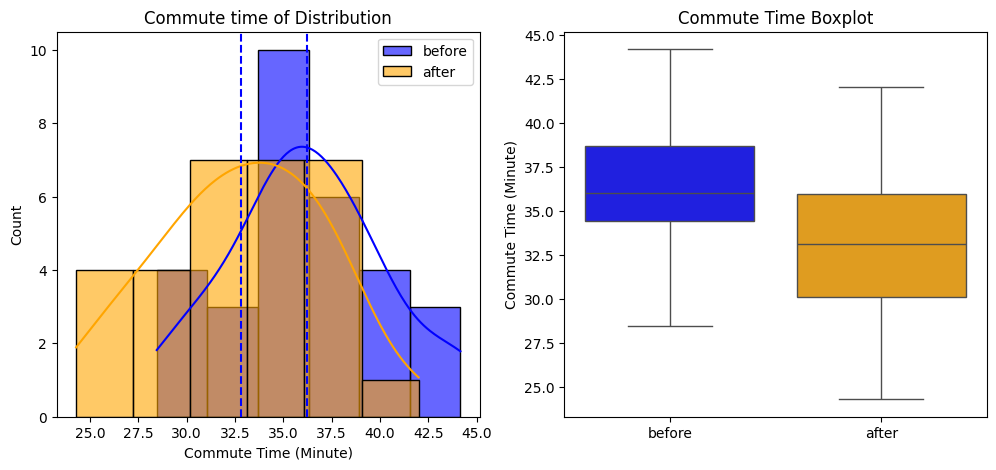

In [20]:
plt.figure(figsize=(12, 5))
## 첫번재 서브플롯
plt.subplot(1,2,1)
sns.histplot(commute_before, kde=True, color='blue', label='before', alpha=0.6)  
# KDE 포함 여부 설정

sns.histplot(commute_after, kde=True, color='orange', label='after', alpha=0.6)  

plt.axvline(np.mean(commute_before), color='blue', linestyle='dashed')

plt.axvline(np.mean(commute_after), color='blue', linestyle='dashed')

plt.title('Commute time of Distribution')
plt.xlabel('Commute Time (Minute)')
plt.legend()


## 두번째 서브플롯
plt.subplot(1,2,2)
sns.boxplot( data= [commute_before, commute_after], palette=['blue', 'orange'] )

plt.xticks( [0,1], ['before', 'after'] )
plt.title('Commute Time Boxplot')
plt.ylabel('Commute Time (Minute)')

plt.show()

In [ ]:
## 샤피로윌크 검정 수행 - 정규성 확인 
shapiro_before = stats.shapiro(commute_before)

shapiro_after = stats.shapiro(commute_after)

print(f'shapiro-wilk 검정 (도입 전) p-value: {shapiro_before.pvalue:.4f}')
print(f'shapiro-wilk 검정 (도입 후) p-value: {shapiro_after.pvalue:.4f}')

shapiro-wilk 검정 (도입 전) p-value: 0.6868
shapiro-wilk 검정 (도입 후) p-value: 0.9130


In [27]:
## t-검정 수행 - 통계적 유효성 파악
## 대응표본 t-검정 함수 사용
paired_t_stat, p_value = stats.ttest_rel(commute_before, commute_after)

print(f"대응표본 t-검정 t-통계량: {paired_t_stat:.4f}")
print(f'p-value: {p_value:.4f}')

대응표본 t-검정 t-통계량: 3.2956
p-value: 0.0026
